In [1]:
%matplotlib widget
import argparse
import gc
import random
import torch
from PIL import Image
from torchvision.transforms import PILToTensor
from src.models.dift_sd import SDFeaturizer
from src.utils.visualization import Demo

In [2]:
torch.cuda.set_device(0)

In [3]:
dift = SDFeaturizer()

/home/venky/miniconda3/envs/p3po/lib/python3.9/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
# you can choose visualize cat or guitar
category = random.choice(['cat', 'guitar'])

print(f"let's visualize semantic correspondence on {category}")

let's visualize semantic correspondence on cat


In [5]:
if category == 'cat':
    filelist = ['./assets/cat.png', './assets/target_cat.png', './assets/target_cat.png']
elif category == 'guitar':
    filelist = ['./assets/guitar.png', './assets/target_guitar.png', './assets/target_guitar.png']

prompt = f'a photo of a {category}'

In [6]:
ft = []
imglist = []

# decrease these two if you don't have enough RAM or GPU memory
img_size = 768
ensemble_size = 8

for filename in filelist:
    img = Image.open(filename).convert('RGB')
    img = img.resize((img_size, img_size))
    imglist.append(img)
    img_tensor = (PILToTensor()(img) / 255.0 - 0.5) * 2
    ft.append(dift.forward(img_tensor,
                           prompt=prompt,
                           ensemble_size=ensemble_size))
ft = torch.cat(ft, dim=0)

gc.collect()
torch.cuda.empty_cache()

In [7]:
demo = Demo(imglist, ft, img_size)

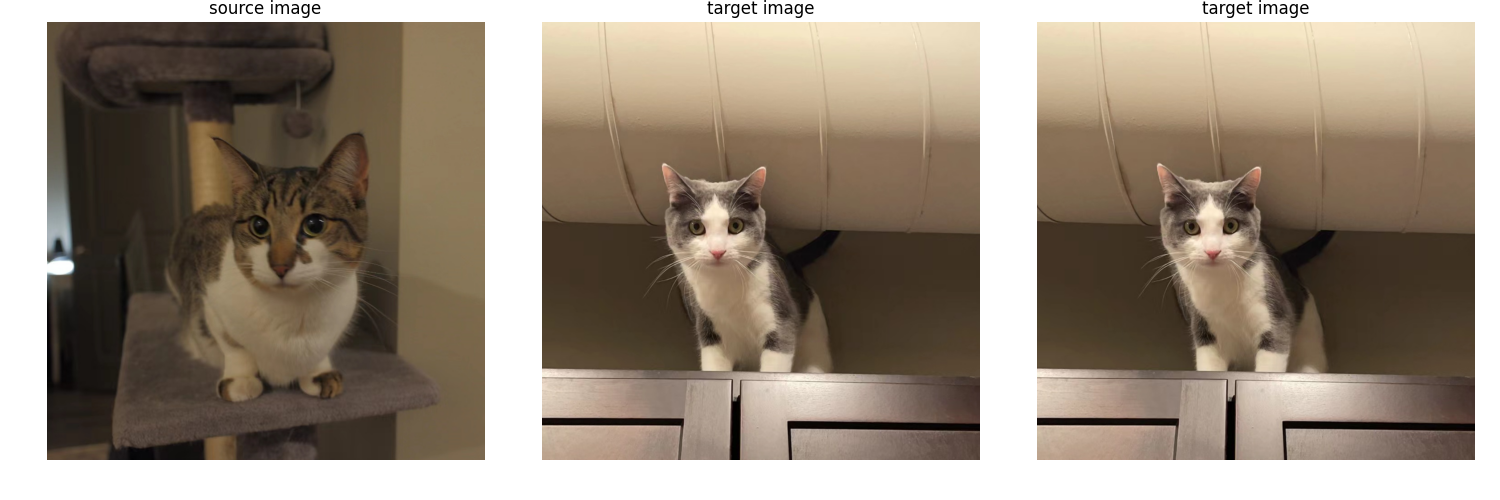

In [8]:
'''
left is source image, right is target image.
you can click on the source image, and DIFT will find the corresponding
point on the right image, mark it with red point and also plot the per-pixel 
cosine distance as heatmap.
'''
demo.plot_img_pairs(fig_size=5)